In [297]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [298]:
mouse_metadata = "Mouse_metadata.csv"

In [299]:
mouse_metadata_data = pd.read_csv("Mouse_metadata.csv")

In [300]:
mouse_metadata_data 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [301]:
study_metadata = "Study_results.csv"

In [302]:
study_metadata_data = pd.read_csv("Study_results.csv")

In [303]:
study_metadata_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [304]:
Merged_study_data = pd.merge(study_metadata_data, mouse_metadata_data, on="Mouse ID", how="left")

In [305]:
Merged_study_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [306]:
#Summary Statistics#

In [307]:
median = Merged_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

In [308]:
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [309]:
mean = Merged_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

In [310]:
mean 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [311]:
variance = Merged_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

In [312]:
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [313]:
sd= Merged_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

In [314]:
sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [315]:
sem= Merged_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [316]:
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [317]:
statistical_summary = pd.DataFrame({"mean": mean, "median": median, "variance": variance, "sd": sd,"SEM": sem})

In [318]:
cleaned_data= statistical_summary.round(1)

In [319]:
cleaned_data

,mean,median,variance,sd,SEM
Drug Regimen,,,,,
Capomulin,40.7,41.6,24.9,5.0,0.3
Ceftamin,52.6,51.8,39.3,6.3,0.5
Infubinol,52.9,51.8,43.1,6.6,0.5
Ketapril,55.2,53.7,68.6,8.3,0.6
Naftisol,54.3,52.5,66.2,8.1,0.6
Placebo,54.0,52.3,61.2,7.8,0.6
Propriva,52.3,50.9,42.4,6.5,0.5
Ramicane,40.2,40.7,23.5,4.8,0.3
Stelasyn,54.2,52.4,59.5,7.7,0.6


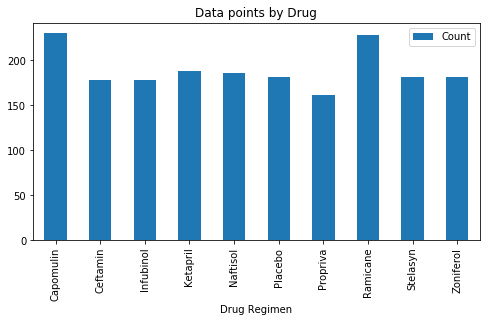

In [320]:
#plotting cleaned data in a bar plot using pandas DataFrame.plot()
bar_plot = pd.DataFrame(Merged_study_data.groupby(["Drug Regimen"]).count()).reset_index()
bar_plot = bar_plot[["Drug Regimen","Mouse ID"]] 
bar_plot = bar_plot.rename(columns={"Mouse ID": "Count"})
final_bar_output = bar_plot.set_index("Drug Regimen")
final_bar_output.plot(kind = "bar", figsize=(8,4.),title="Data points by Drug")

In [321]:
# same bar graph uing Matplotlib

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

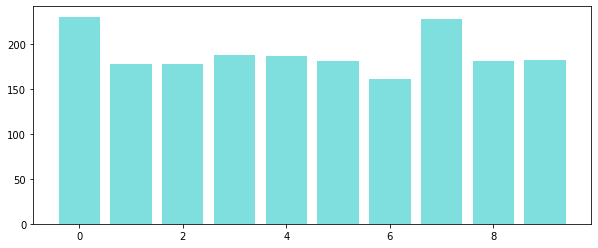

In [322]:
Matplot_graph = cleaned_data.index.tolist()
Matplot_graph = (Merged_study_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
Matplot_= np.arange(len(Matplot_graph))
plt.figure(figsize=(10,4))
plt.bar(Matplot_, Matplot_graph, color='c', alpha=0.5, align="center")
Matplot_

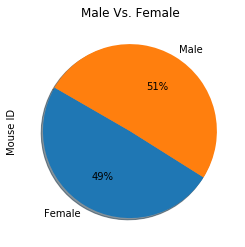

In [323]:
male_female = Merged_study_data.groupby('Sex')['Mouse ID'].count()
pie = male_female .plot(kind='pie', autopct='%1.0f%%' , title="Male Vs. Female", shadow=True, startangle=150)
plt.show()

[935, 958]

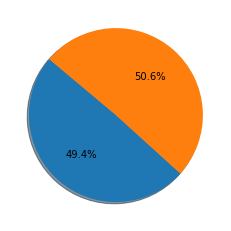

In [324]:
male_female = Merged_study_data.groupby(["Sex"])["Age_months"].count().tolist()
plt.pie(male_female,autopct="%1.1f%%", shadow=True, startangle=140)
male_female 

In [325]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 
#Calculate the quartiles and IQR and quantitatively determine 
#if there are any potential outliers across all four treatment regimens.

In [326]:
treatment_regimes = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' ]

In [327]:
treatments = Merged_study_data.loc[Merged_study_data['Drug Regimen'].isin(treatment_regimes)]

In [328]:
treatments_2 =treatments.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID','Drug Regimen']).sort_values('Mouse ID')
treatments_2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1773,a411,45,38.407618,1,Ramicane,Male,3,22
1836,a444,45,43.047543,0,Ramicane,Female,10,25


In [329]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

In [330]:
#time_point = Merged_study_data.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

In [331]:
#functions allows for all drug regimen that equal to Capomulin to be isolated out

campomulin = Merged_study_data.loc[Merged_study_data["Drug Regimen"] == "Capomulin"]

In [332]:
campomulin = campomulin.reset_index()

In [333]:
campomulin.head(5)

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [334]:
# select a single mouse to be isolated with the drug campomulin. this is the same function use to isolate the drug capomulin
# use to isolate drugs.

single_mouse = campomulin.loc[campomulin["Mouse ID"] == "r554"]
single_mouse.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
2,227,r554,0,45.000000,0,Capomulin,Female,8,17
42,433,r554,5,45.781746,1,Capomulin,Female,8,17
50,498,r554,10,39.005494,2,Capomulin,Female,8,17
86,808,r554,15,35.463758,2,Capomulin,Female,8,17
103,940,r554,20,36.015589,2,Capomulin,Female,8,17


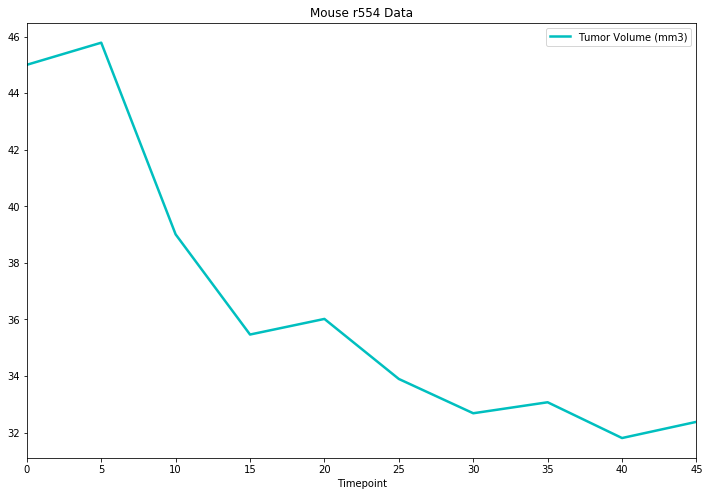

In [335]:
single_mouse = single_mouse.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
single_mouse = single_mouse.reset_index(drop=True)
single_mouse.set_index('Timepoint').plot(figsize=(12, 8),  title="Mouse r554 Data", linewidth=2.5, color='c')

In [336]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

In [337]:
Scatter_plot= campomulin
Scatter_plot

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,226,j246,0,45.000000,0,Capomulin,Female,21,21
2,227,r554,0,45.000000,0,Capomulin,Female,8,17
3,228,s185,0,45.000000,0,Capomulin,Female,3,17
4,229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...,...
225,1854,s710,45,40.728578,1,Capomulin,Female,1,23
226,1859,j119,45,38.125164,1,Capomulin,Female,7,23
227,1878,i557,45,47.685963,1,Capomulin,Female,1,24
228,1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [338]:
Scatter= pd.DataFrame(Scatter_plot.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
Scatter.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


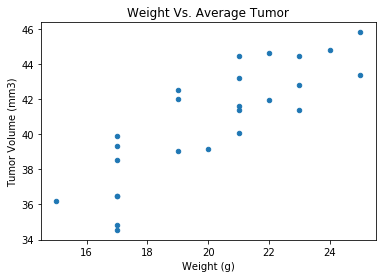

In [339]:
Scatter.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",
              title="Weight Vs. Average Tumor")
plt.show()


In [340]:
#Correlation and Regression analysis

In [344]:
Scatter.head(3)

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973


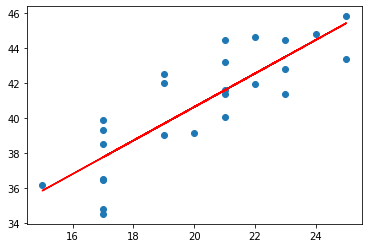

In [356]:
x_values = Scatter['Weight (g)']
y_values = Scatter['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

In [ ]:
#Observation
# The Data set was exteremly clean whcih is extremrly rare.
# The Regression analysis shows there is a strong corellation between the weight of a cat and their Tumor volume. 
# Looking at the data point from mouse  r554 we can see that the reduction in tumor size is extremly rapid with a signifcant drop
# from  timpoint 5 and 15. 